# Ubiquitous NumPy

I called this notebook **ubiquitous numpy** as the main goal of this section is to show examples of **how much is the impact** of NumPy over the Scientific Python Ecosystem.

Later on, see also this **extra** notebook: [Extra Torch Tensor](extra_torch_tensor.ipynb) - _Requires PyTorch_

![scipy](images/scipy.png)

## 1. `pandas` and `pandas.DataFrame`

![df](images/df_outside.png)

![df_inside](images/df_inside.png)

![](images/df_inside_numpy.png)

# Machine Learning (and Numpy Arrays)

Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at a very simple machine learning tasks here: the **clustering** task

## *Data* for Machine Learning Algorithms

Data in machine learning algorithms, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`.

The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.

- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. 

This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

### Addendum

There is a dedicated notebook in the training material, explicitly dedicated to `scipy.sparse`: [07_1_Sparse_Matrices](./07_1_Sparse_Matrices.ipynb)

## A Simple Example: the Iris Dataset

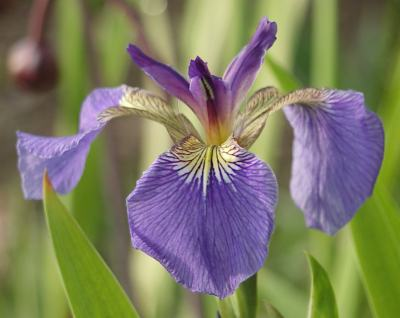

Iris Setosa



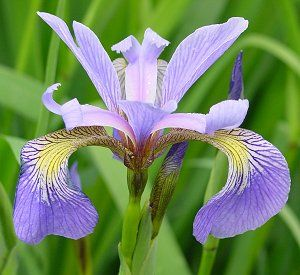

Iris Versicolor



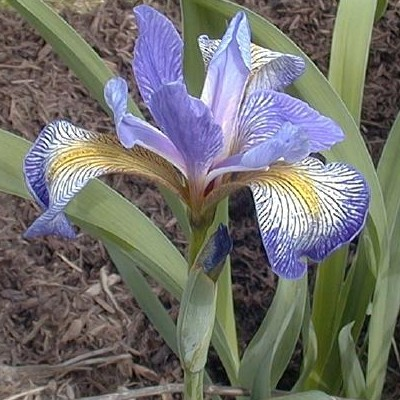

Iris Virginica


In [1]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Try by yourself one of the following commands where *'d'* is the variable containing the dataset:

    print(iris.keys())           # Structure of the contained data
    print(iris.DESCR)            # A complete description of the dataset
    print(iris.data.shape)       # [n_samples, n_features]
    print(iris.target.shape)     # [n_samples,]
    print(iris.feature_names)
    datasets.get_data_home() # This is where the datasets are stored

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(type(iris.data))

<class 'numpy.ndarray'>


In [6]:
X = iris.data
print(X.size, X.shape)

600 (150, 4)


In [7]:
y = iris.target
type(y)

numpy.ndarray

### Clustering

Clustering example on **iris dataset** data using `sklearn.cluster.KMeans`

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmean = KMeans(n_clusters=3)
kmean.fit(iris.data)
kmean.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [10]:
kmean.cluster_centers_.shape

(3, 4)

#### Plotting using `matplotlib`

Matplotlib is one of the most popular and widely used plotting library in Python. Matplotlib is tightly integrated with NumPy as all the functions expect `ndarray` in input.

In [11]:
from itertools import combinations
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
rgb = np.empty(shape=y.shape, dtype='<U1')
rgb[y==0] = 'r'
rgb[y==1] = 'g'
rgb[y==2] = 'b'

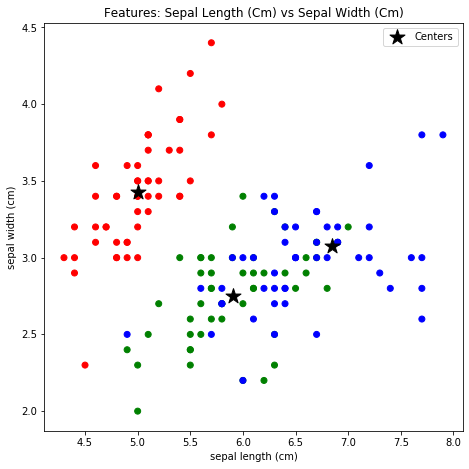

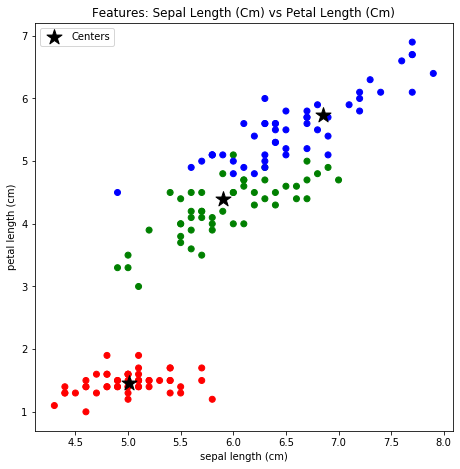

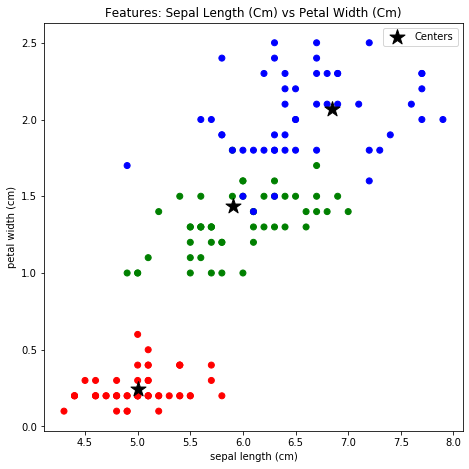

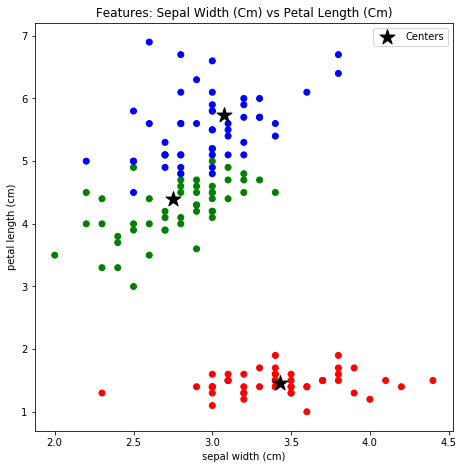

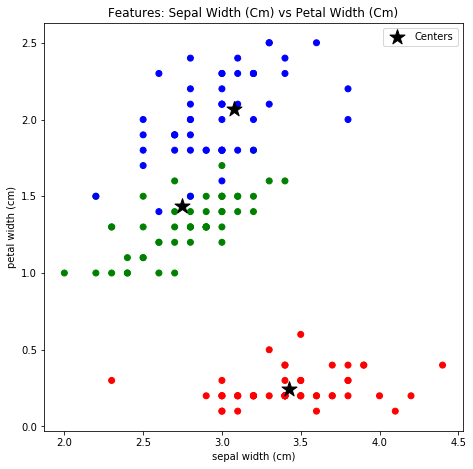

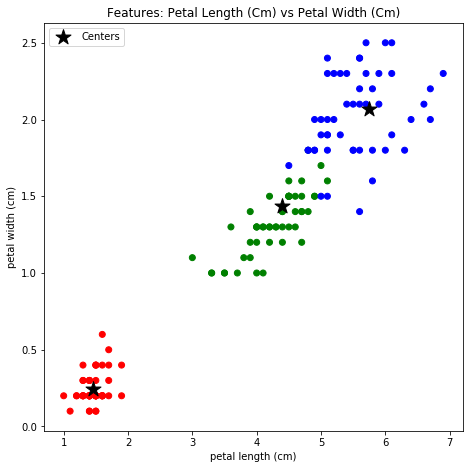

In [13]:
for cols in combinations(range(4), 2):
    f, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.scatter(X[:, cols[0]], X[:, cols[1]], c=rgb)
    ax.scatter(kmean.cluster_centers_[:, cols[0]],
               kmean.cluster_centers_[:, cols[1]], marker='*', s=250,
               color='black', label='Centers')
    feature_x = iris.feature_names[cols[0]]
    feature_y = iris.feature_names[cols[1]]
    ax.set_title("Features: {} vs {}".format(feature_x.title(),
                                            feature_y.title()))
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.legend(loc='best')

    plt.show()